In [1]:
from getdata import GetData

In [2]:
# API 인증키
key = "D9C2C32A-110D-3F33-846F-A831EE3AF020"
# GetData 인스턴스 생성
data = GetData(key, 'GSBD_DG_geo.csv', 'warehouse_coord.geojson', 'polygonized.gpkg')

In [3]:
danger = data.get_lon_lat("dng")
restricted = data.get_lon_lat("res")
prohibited = data.get_lon_lat("prh")

https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISDNGC&columns=dng_lbl_1,dng_lbl_2,dng_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISRESC&columns=restricted,res_lbl_1,res_lbl_2,res_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISPRHC&columns=prohibited,prh_lbl_1,prh_lbl_2,prh_lbl_3,prh_lbl_4,prh_typ,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=


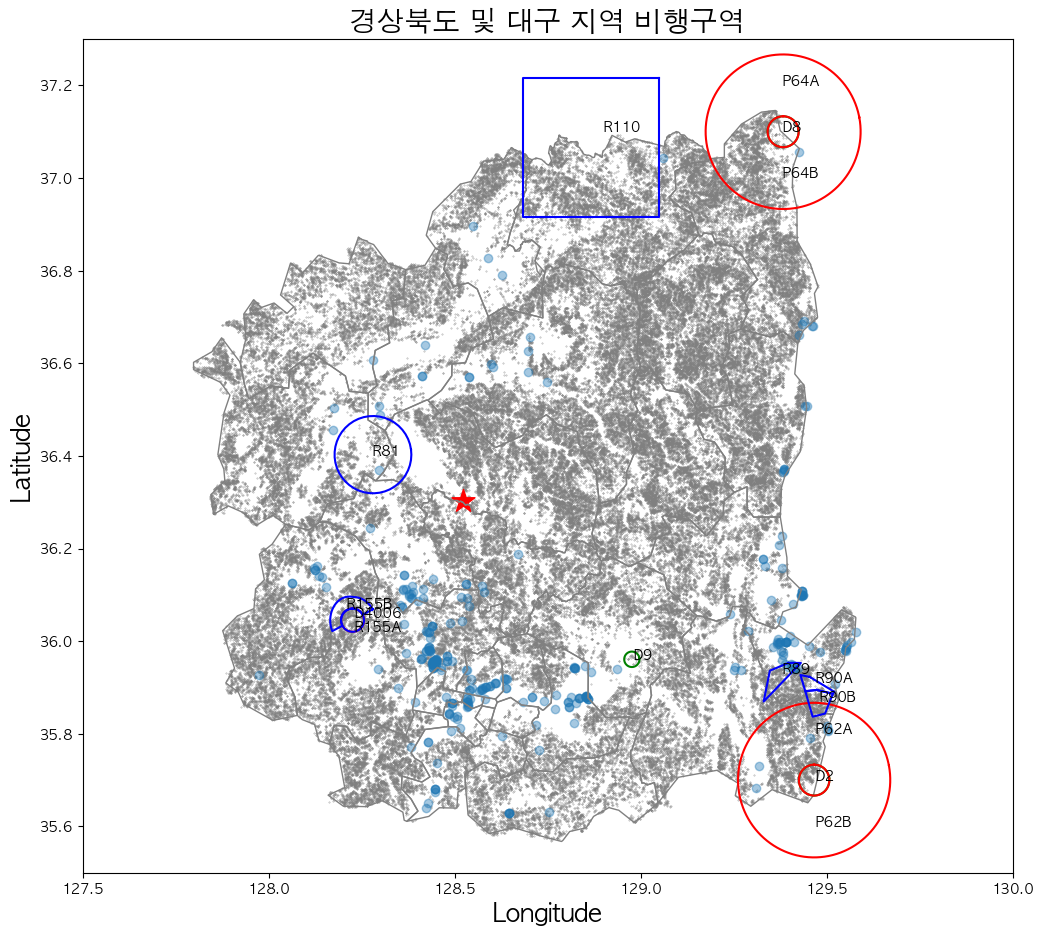

In [4]:
# save = True: 사진 저장
data.plt_visualize(danger, prohibited, restricted, save=True)

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


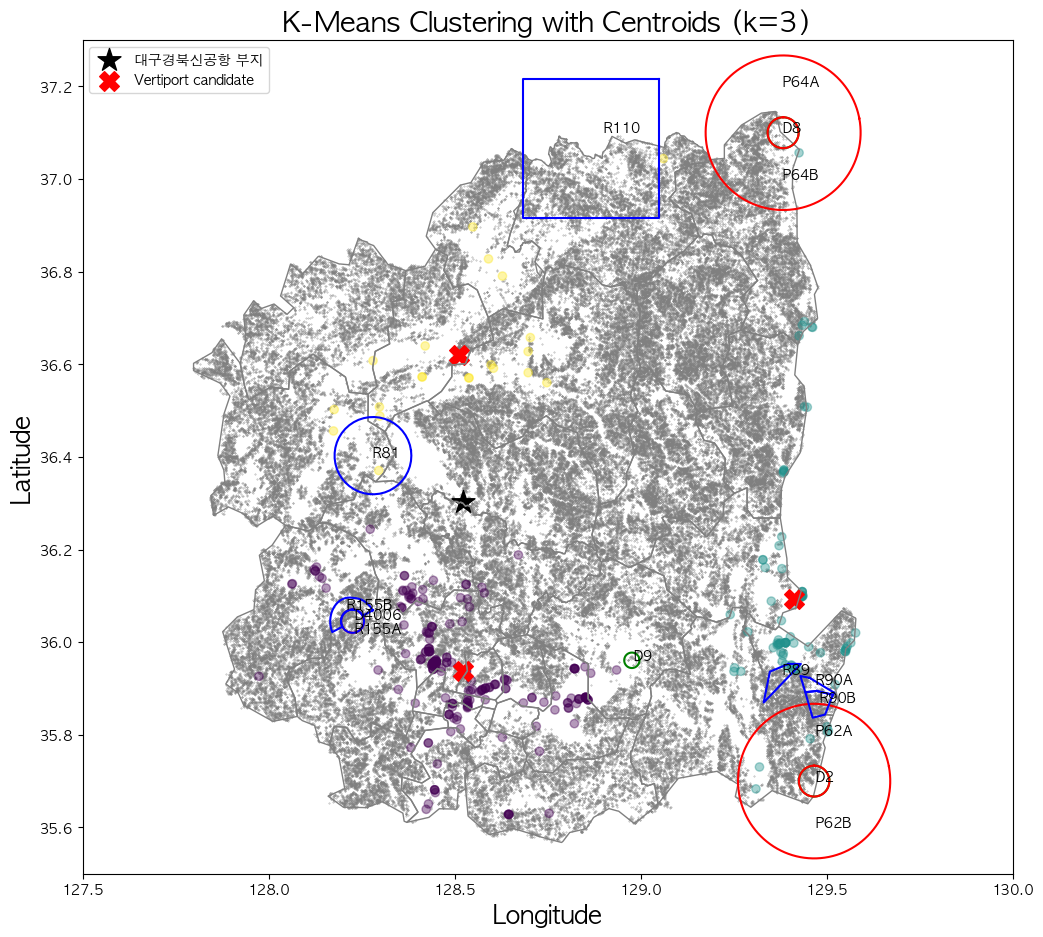

In [5]:
warehouse_df, centroids_df = data.Kmeans(3, danger, prohibited, restricted, save=True)

In [6]:
warehouse_df

,lon,lat,cluster
0,128.450642,35.957427,0
1,128.450642,35.957427,0
2,128.520599,36.044100,0
3,128.411952,35.964536,0
4,128.507323,35.839350,0
...,...,...,...
305,128.444991,35.956688,0
306,128.442744,35.954255,0
307,128.449856,35.961823,0
308,129.434048,36.100115,1


In [8]:
centroids_df

,lon,lat,cluster
0,128.523441,35.937770,0
1,129.412142,36.092410,1
2,128.511024,36.620758,2


In [5]:
restricted_rev = data.get_lat_lon("res")
danger_rev = data.get_lat_lon("dng")
prh_rev = data.get_lat_lon("prh")

https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISRESC&columns=restricted,res_lbl_1,res_lbl_2,res_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISDNGC&columns=dng_lbl_1,dng_lbl_2,dng_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISPRHC&columns=prohibited,prh_lbl_1,prh_lbl_2,prh_lbl_3,prh_lbl_4,prh_typ,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=


In [6]:
# 선 클릭하면 해당 제한구역의 이름 확인 가능
data.folium_visualize(prh_rev, restricted_rev, danger_rev)